# Learning Continuous Attractors

This Jupyter notebook contains code for learning a continuous attractor model of
a grid cell module, using rate coding.  It is based on the ideas from
Widloski & Fiete, 2014, who use a similar system to learn a spiking version of
a continuous attractor network.

We learn a network with two different populations of excitatory neurons, one which
is hardwired to prefer "left" movement, and one which is hardwired to prefer
"right" movement.  It also includes a population of inhibitory neurons.
It lacks connections between excitatory neurons; all CAN dynamics are based on
inhibition.

In [47]:
# Imports and notebook statements
%load_ext autoreload
%autoreload 2
%matplotlib notebook

from CAN import CAN1DNetwork
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [50]:
dt = 0.01
network = CAN1DNetwork(200,
                       200,
                       50,
                       dt=dt,
                       decayConstant=.03,
                       globalTonicMagnitude=0,
                       constantTonicMagnitude=0,
                       stdpWindow=0.1/dt)

<IPython.core.display.Javascript object>


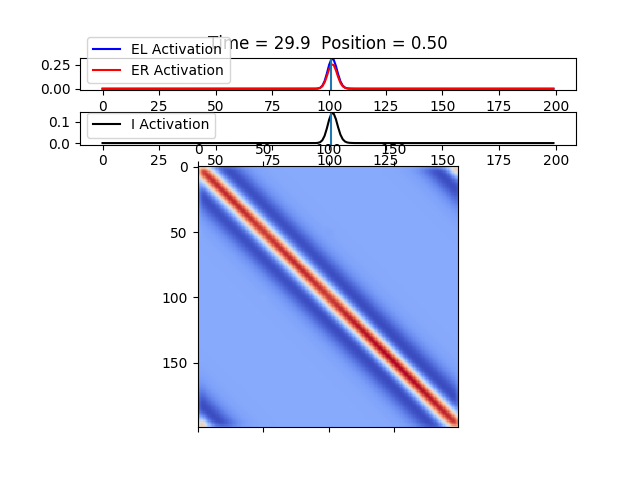

In [51]:
for i in range(1):
    network.learn(3, dir=1, periodic=True, recurrent=False)

<IPython.core.display.Javascript object>


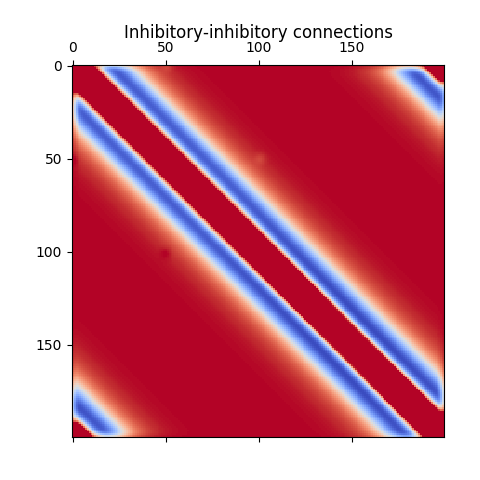

<IPython.core.display.Javascript object>


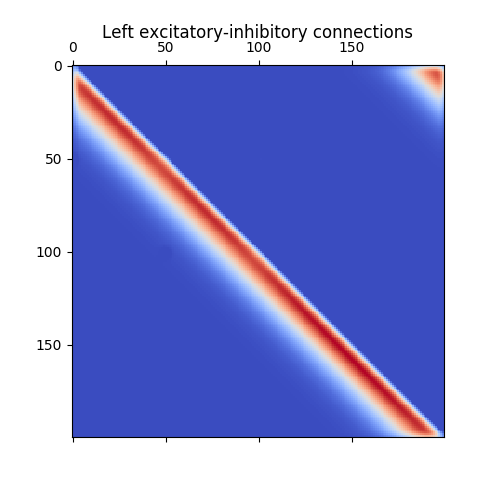

<IPython.core.display.Javascript object>


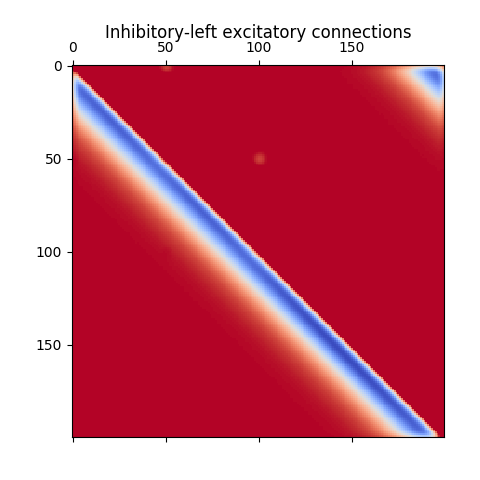

In [52]:
plt.matshow(network.weightsII, cmap=plt.cm.coolwarm)
plt.title("Inhibitory-inhibitory connections")
plt.show()
plt.matshow(network.weightsELI, cmap=plt.cm.coolwarm)
plt.title("Left excitatory-inhibitory connections")
plt.show()
plt.matshow(network.weightsIEL, cmap=plt.cm.coolwarm)
plt.title("Inhibitory-left excitatory connections")
plt.show()

## Network Simulations
We now simulate the network in two different modes; one where the animal is standing still, and one where the animal is moving.  In the first case, we show that the continuous attractor network produces a stable network with multiple firing fields, and in the second we show that the continuous attractor network is capable of conducting accurate path integration.

<IPython.core.display.Javascript object>


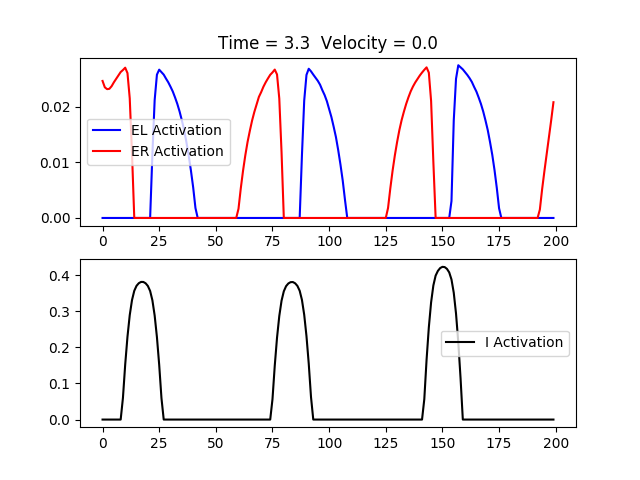

KeyboardInterrupt: 

In [53]:
feedforwardE = np.ones((200,))
feedforwardI = np.ones((200,))
network.simulate(10,
                 feedforwardI,
                 feedforwardE,
                 v=0.0, # Standing still
                 dt=0.001,
                 recurrent=True,
                 envelope=False,
                 inputNoise=None)

<IPython.core.display.Javascript object>


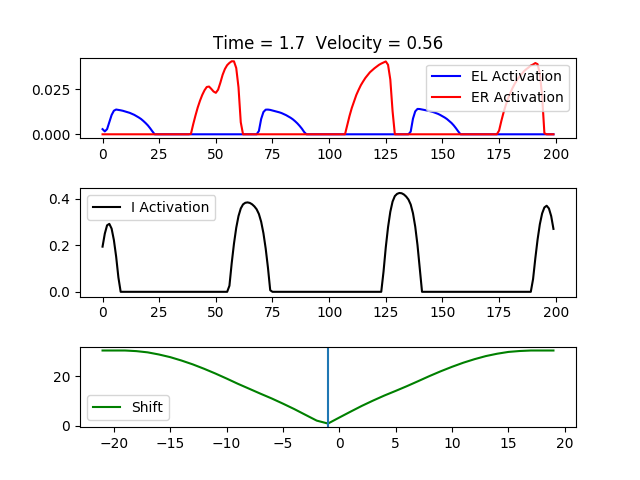

In [ ]:
trueVelocities, estimatedVelocities = network.calculatePathIntegrationError(25,
                                                                            dt=0.001,
                                                                            inputNoise=None,
                                                                            envelope=False)

### Path integration quality:

<IPython.core.display.Javascript object>


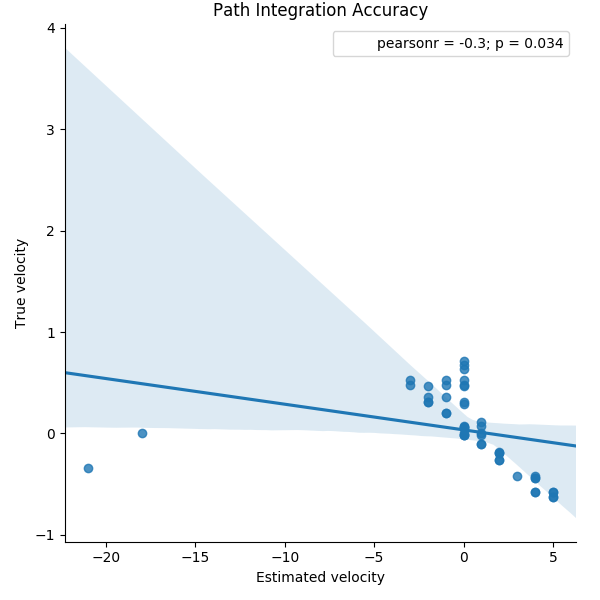

In [61]:
g = sns.JointGrid(np.asarray(estimatedVelocities), np.asarray(trueVelocities), ratio=100)
g.plot_joint(sns.regplot)
g.annotate(stats.pearsonr)
g.ax_marg_x.set_axis_off()
g.ax_marg_y.set_axis_off()
plt.title("Path Integration Accuracy")
plt.xlabel("Estimated velocity")
plt.ylabel("True velocity")
plt.tight_layout()
plt.show()

In [56]:
model = LinearRegression().fit(estimatedVelocities.reshape(-1, 1), trueVelocities)
predictedValues = model.predict(estimatedVelocities.reshape(-1, 1))
print("RMSE is {}".format(np.sqrt(np.mean((predictedValues - trueVelocities)**2))))
averageError = np.mean(np.abs(predictedValues - trueVelocities))/np.mean(np.abs(trueVelocities))
print("Average error is {}% of average movement speed".format(str(averageError*100)[:4]))

RMSE is 0.119995408591
Average error is 26.4% of average movement speed
